# Plotting Categorical Data

In this section, we will:
- Plot distributions of data across categorical variables
- Plot aggregate/summary statistics across categorical variables


## Plotting Distributions Across Categories

We have seen how to plot distributions of data. Often, the distributions reveal new information when you plot them across categorical variables.

Let's see some examples.

In [1]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")

# read data
market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")


### Boxplots 

We had created simple boxplots such as the ones shown below. Now, let's plot multiple boxplots and see what they can tell us the distribution of variables across categories.

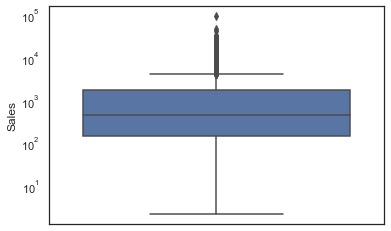

In [4]:
#boxplot of a variable
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')
plt.show()